## data preprocess

#### data features

In [30]:
import numpy as np
import pandas as pd
import seaborn as sb

In [11]:
# load data & show head
df = pd.read_csv('./cs5228/train.csv')
print(df.shape)
df.head()

(24421, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,?,147215,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States,0
2,52,?,105428,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,12,United-States,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,Male,7298,0,48,United-States,1


In [6]:
# get all features of data
feature_list = df.columns
print(feature_list)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'exceeds50K'],
      dtype='object')


In [56]:
# statistics of features
print('info of columns:\n', df.info(), '\n\n')
print('unique values count:\n', df.nunique(), '\n\n')
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24421 non-null  int64 
 1   workclass       24421 non-null  object
 2   fnlwgt          24421 non-null  int64 
 3   education       24421 non-null  object
 4   education-num   24421 non-null  int64 
 5   marital-status  24421 non-null  object
 6   occupation      24421 non-null  object
 7   relationship    24421 non-null  object
 8   sex             24421 non-null  object
 9   capital-gain    24421 non-null  int64 
 10  capital-loss    24421 non-null  int64 
 11  hours-per-week  24421 non-null  int64 
 12  native-country  24421 non-null  object
 13  exceeds50K      24421 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.6+ MB
info of columns:
 None 


unique values count:
 age                  74
workclass             9
fnlwgt            17578
education        

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,24421,NaN,NaN,NaN,38.587,13.6771,17,28,37,48,90
workclass,24421,9,Private,16863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,24421,NaN,NaN,NaN,188820,104692,12285,117583,177824,236586,1.4904e+06
education,24421,16,HS-grad,7861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,24421,NaN,NaN,NaN,10.0965,2.57449,1,9,10,13,16
marital-status,24421,7,Married-civ-spouse,11223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,24421,15,Prof-specialty,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,24421,6,Husband,9863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,24421,2,Male,16338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,24421,NaN,NaN,NaN,1116.03,7646.59,0,0,0,0,99999


In [65]:
for col in feature_list:
    print('\n', "'{}' distribution".format(col))
    print(df[col].value_counts())


 'age' distribution
36    697
35    692
34    665
23    661
33    660
     ... 
87      3
85      2
88      2
86      1
89      1
Name: age, Length: 74, dtype: int64

 'workclass' distribution
 Private             16863
 Self-emp-not-inc     1958
 Local-gov            1607
 ?                    1392
 State-gov            1002
 Self-emp-inc          848
 Federal-gov           735
 Without-pay             9
 Never-worked            7
Name: workclass, dtype: int64

 'fnlwgt' distribution
120277    10
164190     9
194630     9
123011     9
96062      9
          ..
208668     1
198425     1
163606     1
218899     1
213255     1
Name: fnlwgt, Length: 17578, dtype: int64

 'education' distribution
 HS-grad         7861
 Some-college    5424
 Bachelors       4047
 Masters         1336
 Assoc-voc       1040
 11th             870
 Assoc-acdm       815
 10th             698
 7th-8th          488
 Prof-school      432
 9th              362
 12th             333
 Doctorate        302
 5th-6th   

0    18560
1     5861
Name: exceeds50K, dtype: int64
exceed 50k: 5861(24.00%), below 50k: 18560(76.00%)


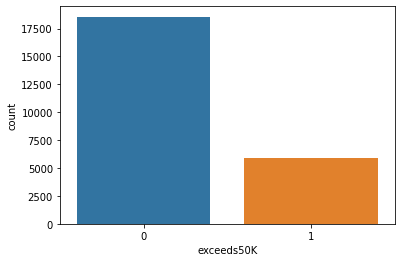

In [36]:
# label distribution
print(df['exceeds50K'].value_counts())
negative_count, positive_count = list(df['exceeds50K'].value_counts())
total_count = positive_count + negative_count
print('exceed 50k: {}({:.2f}%), below 50k: {}({:.2f}%)'.format(
    positive_count, 100*positive_count/total_count, negative_count, 100*negative_count/total_count))
sb.countplot(x='exceeds50K', data=df)

#### nan null outliers

In [39]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
exceeds50K        False
dtype: bool

In [48]:
df.head(1)['workclass'].item()

' ?'

In [49]:
df.head(1)['occupation'].item()

' ?'

In [70]:
for col in feature_list:
    print(col, ' ', len(df[df[col] == ' ?']))

age   0
workclass   1392
fnlwgt   0
education   0
education-num   0
marital-status   0
occupation   1399
relationship   0
sex   0
capital-gain   0
capital-loss   0
hours-per-week   0
native-country   410
exceeds50K   0
